# Pymaceuticals Inc.
---

### Analysis

* Based on the available data, mice treated with Capomulin and Ramicane had the highest number of timepoints, indicating that these treatments were administered for a longer period of time than other treatments. 
* Across the four treatment regimens (Capomulin, Ramicane, Infubinol and Ceftamin), only Infubinol returned a result with an outlier for final tumor volume.
* For mice that were given the Capomulin regimen, their average tumor volume tends to increase as their weight increases (r = 0.84).
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_results_complete = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
metadata_results_complete_df = pd.DataFrame(metadata_results_complete)
metadata_results_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Checking the number of mice.
unique_mouse_ids = metadata_results_complete_df["Mouse ID"].nunique()
print(unique_mouse_ids)

249


In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = metadata_results_complete_df[metadata_results_complete_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate mice:", duplicates['Mouse ID'].unique())


Duplicate mice: ['g989']


In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989_filter = metadata_results_complete_df['Mouse ID'] == 'g989'
mouse_g989_df = metadata_results_complete_df[mouse_g989_filter]

mouse_g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_results_complete_df = metadata_results_complete_df[metadata_results_complete_df['Mouse ID'] != 'g989']
metadata_results_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_ids = metadata_results_complete_df["Mouse ID"].nunique()
print(unique_mouse_ids)

248


## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = metadata_results_complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_stats_df = pd.DataFrame({'Mean Tumor Volume': grouped_regimen.mean(),
                                 'Median Tumor Volume': grouped_regimen.median(),
                                 'Tumor Volume Variance': grouped_regimen.var(),
                                 'Tumor Volume Std. Dev.': grouped_regimen.std(),
                                 'Tumor Volume Std. Err.': grouped_regimen.sem()})

# Assemble the resulting series into a single summary DataFrame.
regimen_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats = ['mean', 'median', 'var', 'std', 'sem']

# Using the aggregation method, produce the same summary statistics in a single line.
regimen_stats_df = metadata_results_complete_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': summary_stats})
regimen_stats_df = regimen_stats_df.rename(columns={'Tumor Volume (mm3)': 'Total Volume (mm3)'})

regimen_stats_df

Total Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts


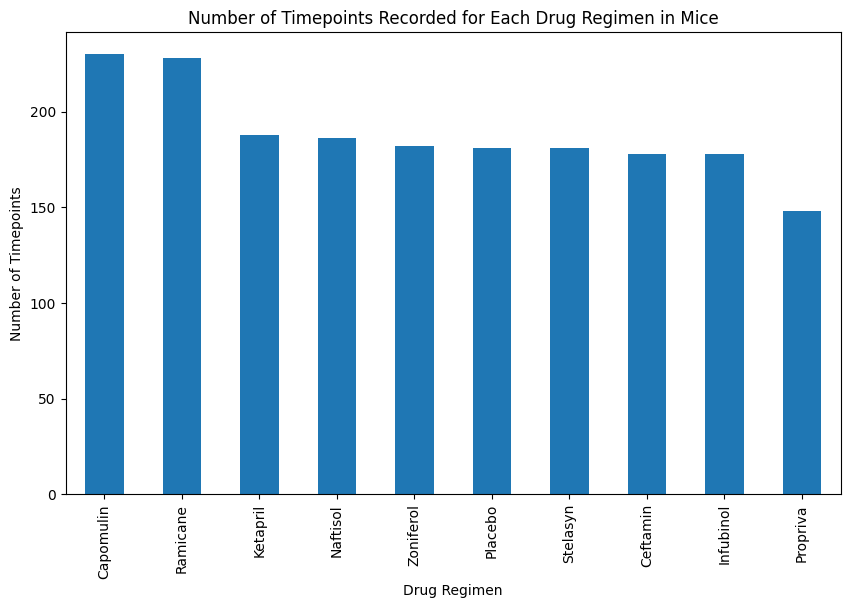

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = metadata_results_complete_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
ax = timepoints.plot.bar(figsize=(10, 6))

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Timepoints")
ax.set_title('Number of Timepoints Recorded for Each Drug Regimen in Mice');


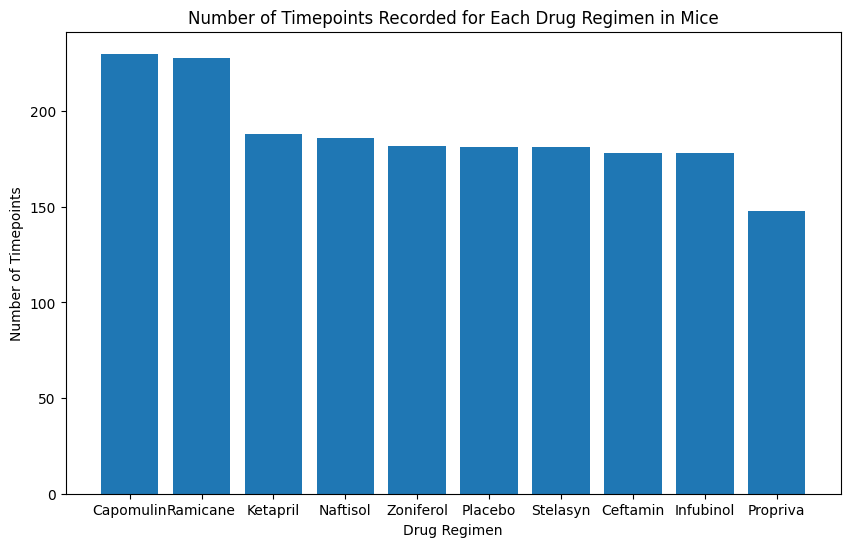

In [100]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = metadata_results_complete_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(timepoints.index, timepoints.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints Recorded for Each Drug Regimen in Mice")

plt.show()

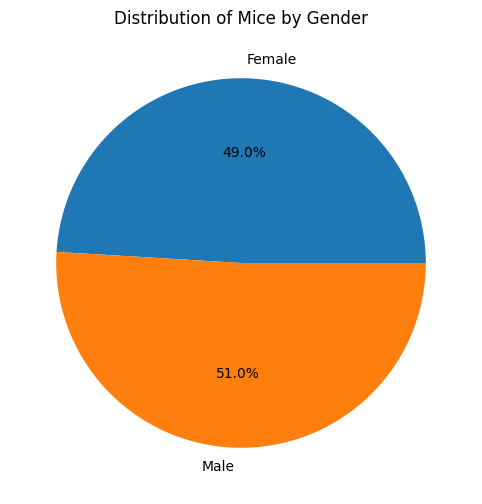

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = metadata_results_complete_df.groupby('Sex').count()
gender_distribution = gender_distribution.rename(columns={'Mouse ID': 'Count'})
ax = gender_distribution.plot(kind='pie', y='Count', autopct='%1.1f%%', startangle=0, figsize=(8, 6), legend=False, ylabel='')
ax.set_title('Distribution of Mice by Gender');

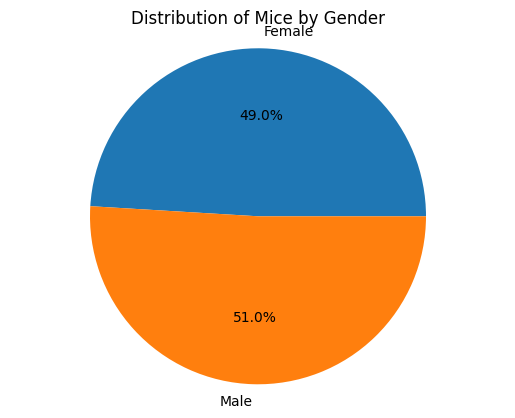

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = metadata_results_complete_df.groupby('Sex').count()
gender_distribution = gender_distribution.rename(columns={'Mouse ID': 'Count'})

plt.pie(gender_distribution['Count'], labels=gender_distribution.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(metadata_results_complete_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(max_timepoint_df, metadata_results_complete_df, on=['Mouse ID', 'Timepoint'], how='left')

final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_volume_df.loc[final_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]


    # Print summary statistics and outliers for each treatment regimen
    print(regimen)
    print(f"---------------------------")
    print(f"Number of potential outliers: {len(outliers)}")
    print(f"Potential Outlier(s): {outliers}\n")


Capomulin
---------------------------
Number of potential outliers: 0
Potential Outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
---------------------------
Number of potential outliers: 0
Potential Outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
---------------------------
Number of potential outliers: 1
Potential Outlier(s): 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin
---------------------------
Number of potential outliers: 0
Potential Outlier(s): Series([], Name: Tumor Volume (mm3), dtype: float64)



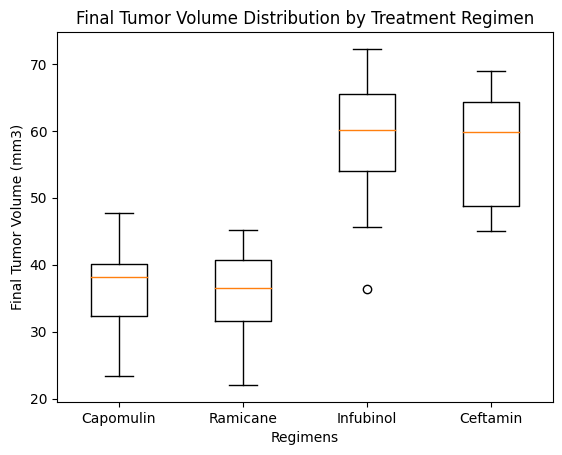

In [105]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Loop through the treatment regimens

# Create a list of tumor volume data for each treatment regimen
tumor_vol_data = [final_volume_df[final_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimen_list]

# Set up the figure and axis
fig = plt.subplots()

# Plot the box plot
plt.boxplot(tumor_vol_data, labels=treatment_regimen_list)


# Set the title and axis labels
plt.title('Final Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Regimens')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

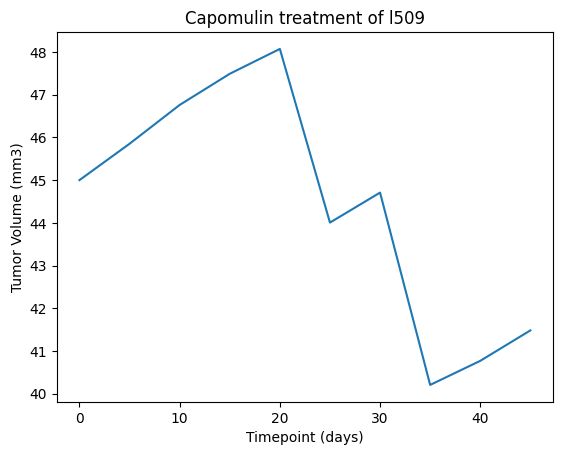

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get the data for a mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = metadata_results_complete_df.loc[(metadata_results_complete_df['Drug Regimen'] == 'Capomulin') & (metadata_results_complete_df['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point
import matplotlib.pyplot as plt

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of {mouse_id}')

plt.show()

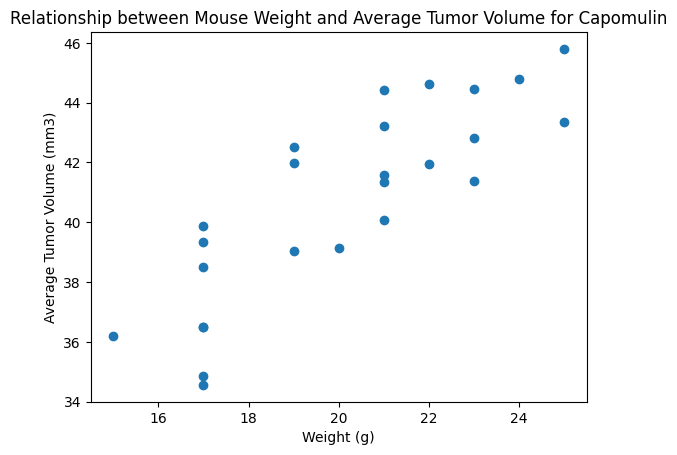

In [107]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter to include only Capomulin
capomulin_df = metadata_results_complete_df[metadata_results_complete_df['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate average tumor volume and weight for each mouse
mouse_average_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(mouse_average_df['Weight (g)'], mouse_average_df['Tumor Volume (mm3)'])

# Add axis labels and a title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Mouse Weight and Average Tumor Volume for Capomulin')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


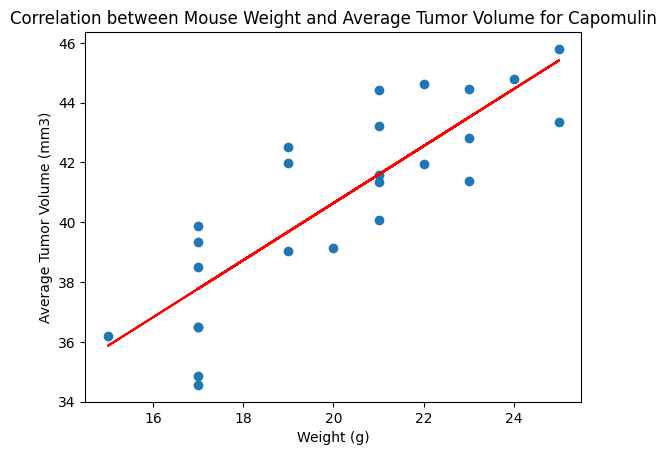

In [108]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the average tumor volume and mouse weight for each mouse
average_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of the data
plt.scatter(mouse_weight, average_tumor_vol)

# Add labels and a title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation between Mouse Weight and Average Tumor Volume for Capomulin')

# Calculate the correlation coefficient and print it
correlation = st.pearsonr(mouse_weight, average_tumor_vol)[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}")

# Perform a linear regression on the data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_vol)

# Create a regression line equation using the slope and intercept values
regress_values = slope * mouse_weight + intercept

# Add the regression line to the scatter plot
plt.plot(mouse_weight, regress_values, "r-")

# Show the plot
plt.show()